# 7/13

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/sport_test.csv',
                 index_col='학생번호')
df

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


In [3]:
df['악력']

학생번호
1     40.2
2     34.2
3     28.8
4     39.0
5     50.9
6     36.5
7     36.6
8     49.2
9     26.0
10    47.4
Name: 악력, dtype: float64

In [4]:
df.shape

(10, 5)

In [ ]:
# 학생번호: 질적 변수, 명의 척도, 이산형 변수
# 학년: 질적 변수, 명의 척도, 이산형 변수
# 악력: 양적 변수, 간격 척도, 연속형 변수
# 윗몸일으키기: 양적 변수, 간격 척도, 이산형 변수
# 점수: 양적 변수, 간격 척도, 이산형 변수
# 순위: 질적 변수, 순서 척도, 이산형 변수

## 1차원 데이터

In [5]:
import numpy as np
import pandas as pd

# Jupyter Noetbook의 출력을 소수점 이하 3자리로 제한
%precision 3

# DataFrame의 출력을 소수점 이하 3자리로 제한
pd.set_option('display.float_format', '{:,.3f}'.format)

In [6]:
df = pd.read_csv('data/scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [7]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [9]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E' ,'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 평균

In [10]:
sum(scores) / len(scores)

55.000

In [11]:
np.mean(scores)

55.000

In [12]:
scores_df.mean()

score   55.000
dtype: float64

### 중앙값

In [13]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [14]:
n = len(sorted_scores)
if n % 2 ==0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2-1]
median

56.500

In [15]:
np.median(scores)

56.500

In [16]:
scores_df.median()

score   56.500
dtype: float64

### 최빈값

In [17]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [18]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

### 분산과 표준편차

In [19]:
mean = np.mean(scores)
deviation = scores - mean
deviation # 편차

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [20]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [22]:
print(np.mean(deviation))
print(np.mean(another_deviation))

0.0
0.0


In [23]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.000
B,69,14.000
C,56,1.000
D,41,-14.000
E,57,2.000
F,48,-7.000
G,65,10.000
H,49,-6.000
I,65,10.000


In [24]:
summary_df.mean()

score       55.000
deviation    0.000
dtype: float64

In [25]:
# 분산
np.mean(deviation ** 2)

86.000

In [26]:
np.var(scores)

86.000

In [27]:
scores_df.var()

score   95.556
dtype: float64

In [28]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.000,169.000
B,69,14.000,196.000
C,56,1.000,1.000
D,41,-14.000,196.000
E,57,2.000,4.000
F,48,-7.000,49.000
G,65,10.000,100.000
H,49,-6.000,36.000
I,65,10.000,100.000


In [29]:
summary_df.mean()

score                 55.000
deviation              0.000
square of deviation   86.000
dtype: float64

In [33]:
# 표준편차
np.sqrt(np.var(scores, ddof=0)) # 제곱근 적용

9.274

In [34]:
np.std(scores, ddof=0)

9.274

In [35]:
# 범위
np.max(scores) - np.min(scores)

28

In [36]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

In [37]:
# 4분위수
pd.Series(scores).describe()

count   10.000
mean    55.000
std      9.775
min     41.000
25%     48.250
50%     56.500
75%     63.250
max     69.000
dtype: float64

### 정규화

In [38]:
# 표준화
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [39]:
np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

In [40]:
# 편차값
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [41]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


### 데이터의 시각화

In [44]:
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count   50.000
mean    58.380
std      9.800
min     37.000
25%     54.000
50%     57.500
75%     65.000
max     79.000
dtype: float64

### 도수분포표

In [45]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [47]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [48]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [49]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [51]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [52]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.000,0.000
10~20,15,0,0.000,0.000
20~30,25,0,0.000,0.000
30~40,35,2,0.040,0.040
40~50,45,8,0.160,0.200
50~60,55,16,0.320,0.520
60~70,65,18,0.360,0.880
70~80,75,6,0.120,1.000
80~90,85,0,0.000,1.000


In [53]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

In [54]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프가 notebook 위에 표시
%matplotlib inline

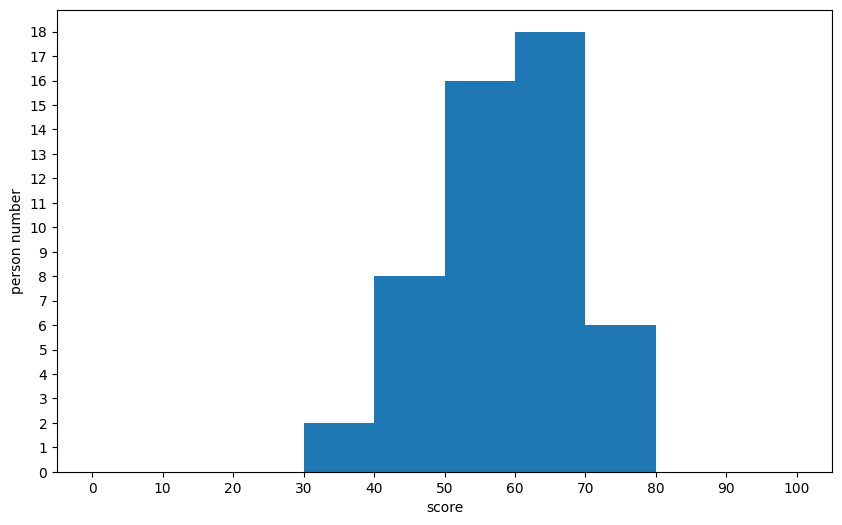

In [55]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)



# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()

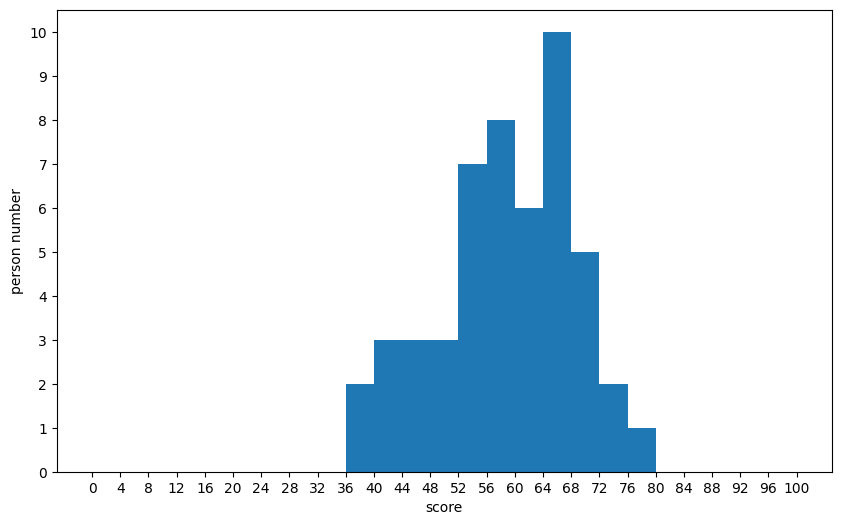

In [56]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

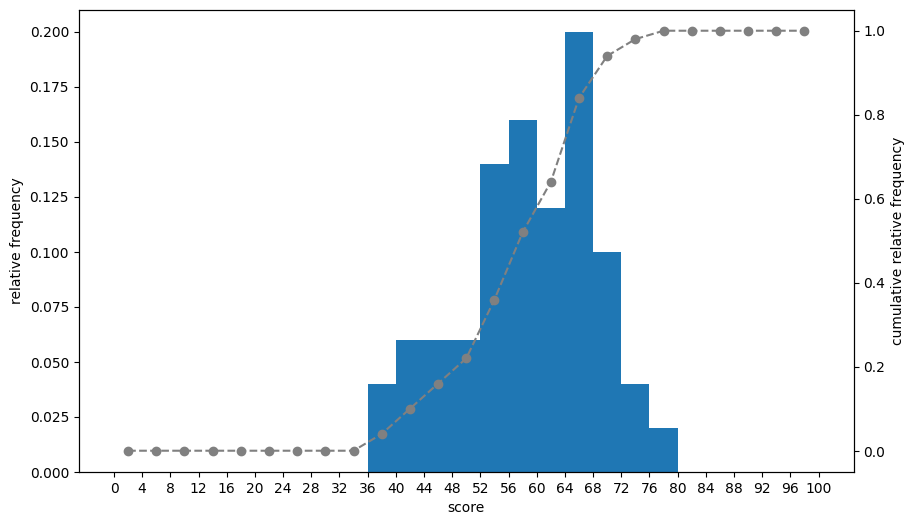

In [57]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그람
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()


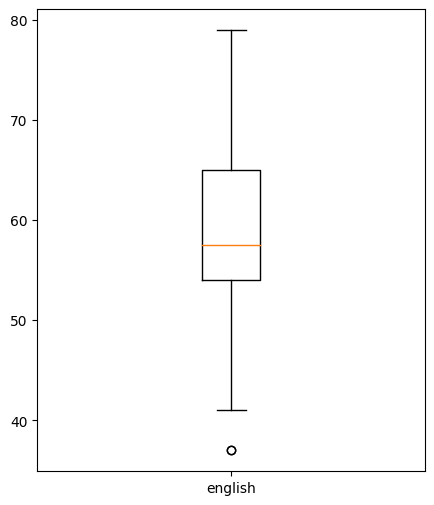

In [58]:
# Box Plot
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()

# 7/14

## 2차원 데이터

In [1]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('display.float_format', '{:,.3f}'.format)

In [2]:
df = pd.read_csv('data/scores_em.csv', index_col='student number')

In [3]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores, 'mathematics':ma_scores},
                          index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))

scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 공분산

In [4]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviation'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
student,,,,,
A,42,65,-13.000,-6.400,83.200
B,69,80,14.000,8.600,120.400
C,56,63,1.000,-8.400,-8.400
D,41,63,-14.000,-8.400,117.600
E,57,76,2.000,4.600,9.200
F,48,60,-7.000,-11.400,79.800
G,65,81,10.000,9.600,96.000
H,49,66,-6.000,-5.400,32.400
I,65,78,10.000,6.600,66.000


In [5]:
summary_df['product of deviation'].mean()

62.800

In [6]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [7]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

In [8]:
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [9]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

### 상관계수

In [10]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] / (np.std(en_scores) * np.std(ma_scores))

0.819

In [11]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [12]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


### 시각화

In [13]:
# 산점도
import matplotlib.pyplot as plt

%matplotlib inline

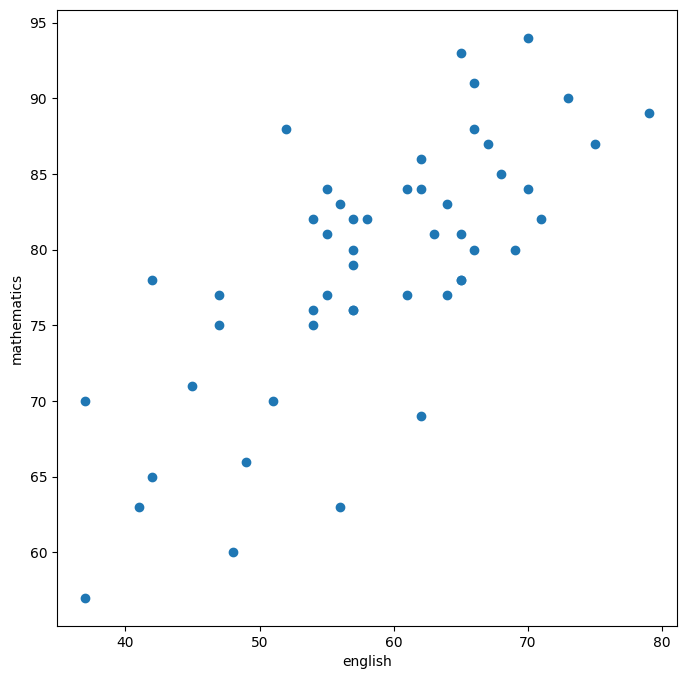

In [14]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()

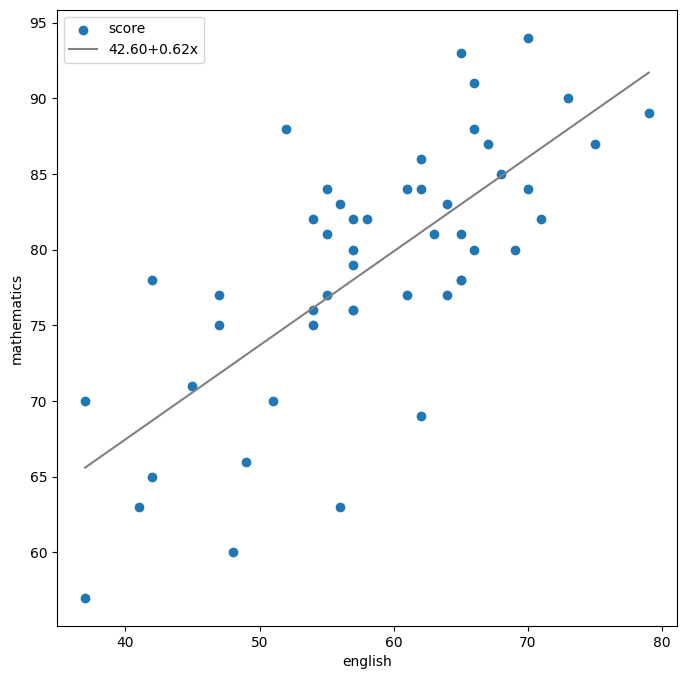

In [15]:
# 회귀선
# 계수 구하기
poly_fit = np.polyfit(english_scores, math_scores, 1)
# 함수 작성
poly_1d = np.poly1d(poly_fit)
# x좌표 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y 좌표 생성
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

ax.legend(loc='upper left')
plt.show()

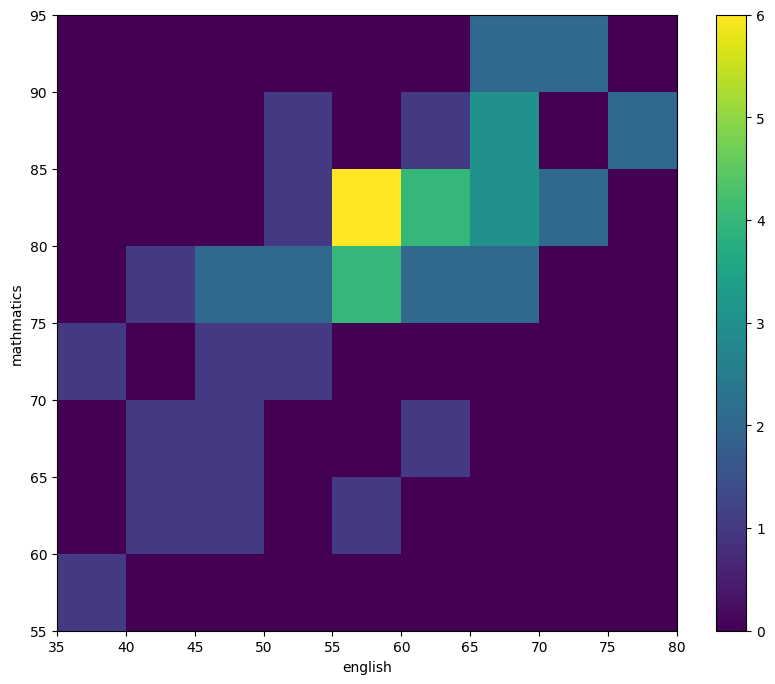

In [16]:
# 히트맵
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathmatics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()

## 앤스컴의 예

In [17]:
# npy 형식으로 저장된 NumPy array를 읽음
anscombe_data = np.load('data/anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [18]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


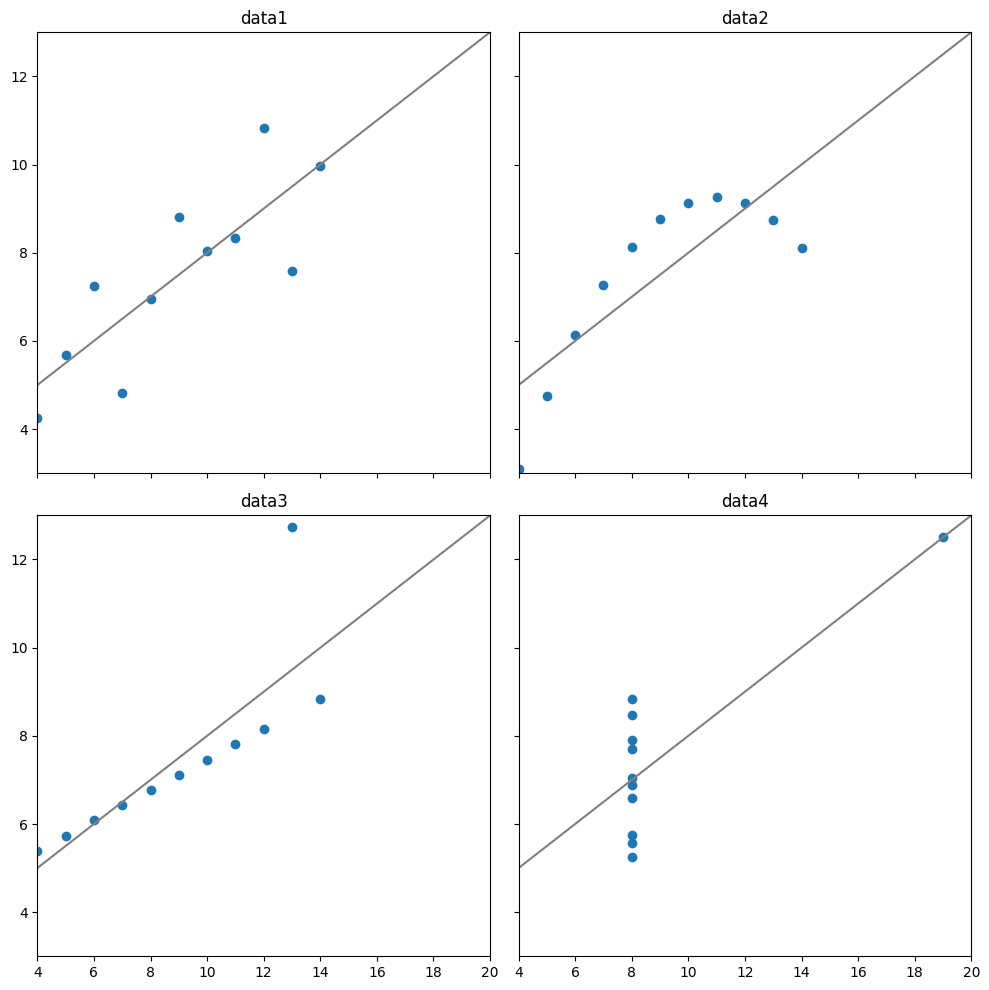

In [19]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()